# Topological Data Analysis of Financial Time Series: Landscapes of Crashes


In this notebook we reproduce the results presented in [Topological Data Analysis of Financial Time Series: Landscapes of Crashes by Gidea and Katz](https://www.sciencedirect.com/science/article/abs/pii/S0378437117309202). 

The method consists of analyzing the persistence landscape time series of point clouds of major indices during the technology crash of 2000, and the financial crisis of 2007-2009. Remarkably, the time series of  𝐿𝑝 -norms of the persistence landscapes demonstrates a strong rising trend for 250 trading days prior to either dotcom crash on 03/10/2000, or to the Lehman bankruptcy on 09/15/2008.

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt

import gudhi as gd
import gudhi.representations
from gudhi.representations import Landscape
import matplotlib.pyplot as plt

We analyze the daily time series of four major US stock market indices: S&P 500, DJIA, NASDAQ, and Russel 2000 between December 23, 1987 and December 08, 2016 (7301 trading days). The times series data were downloaded from Yahoo Finance.

In [2]:
indices = ['^GSPC','^DJI', '^IXIC', '^RUT']

In [3]:
# Download closing prices
data = pdr.get_data_yahoo(indices, start="1987-12-23", end='2016-12-08')['Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 1987-12-23 to 2016-12-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   7301 non-null   float64
 1   ^DJI    6284 non-null   float64
 2   ^IXIC   7301 non-null   float64
 3   ^RUT    7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB


The Dow Jones column has some NaN values which we fill with the next valid observation to fill gap.

In [4]:
data.fillna(method="bfill", inplace = True)

For each index and for each trading day we calculate log-returns defined as the forward daily changes in the logarithm of the ratio 

\begin{align*} r_{ij} & = \log(P_{i,j}/P_{i-1,j}) \\
\end{align*}


where $P_{i,j}$ represents the adjusted closing value of the index $j$ at the day $i$. 

In [5]:
log_returns = np.log(data/data.shift(1))

In [7]:
log_returns.drop(log_returns.index[[0]], inplace = True)

In our approach, the point cloud is formed by $w=50$ points in $\mathbb{R}^4$, where the coordinates of each point in $\mathbb{R}^4$ represent the daily log-returns. The sliding step is set to one day, which in the case under consideration yields a $(7300-w)$ time-ordered set of point clouds.

In [39]:
X_clouds = np.lib.stride_tricks.sliding_window_view(log_returns, window_shape = (50,4), axis = [0,1] )

## Lehman Persistence Landscapes

The next graph offers illustrates how as the stock market becomes more volatile, loops in the relevant point clouds become much more pronounced. This is the persistence diagram of the point cloud that starts with the date of the Lehman bankruptcy on 09/15/2008. 

In [47]:
lehman_date_index = log_returns[: '09-15-2008'].shape[0] -1

In [61]:
lehman_date_index = log_returns[: '09-15-2008'].shape[0] -1
lehman_cloud_9_15 = X_clouds[lehman_date_index - 49][0]

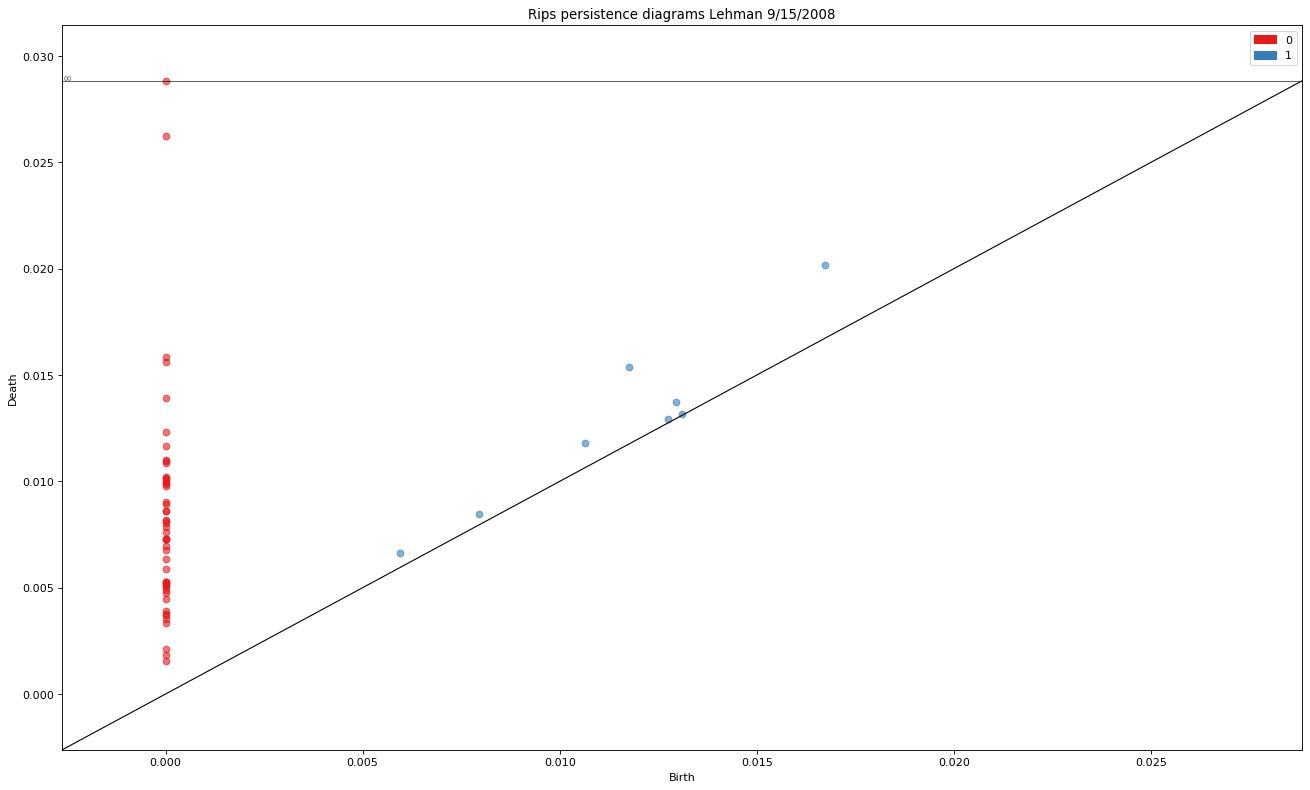

In [62]:
rips_c_lehman_9_15 = gd.RipsComplex(points=lehman_cloud_9_15).create_simplex_tree(max_dimension=2)
dgm = rips_c_lehman_9_15.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Lehman 9/15/2008");

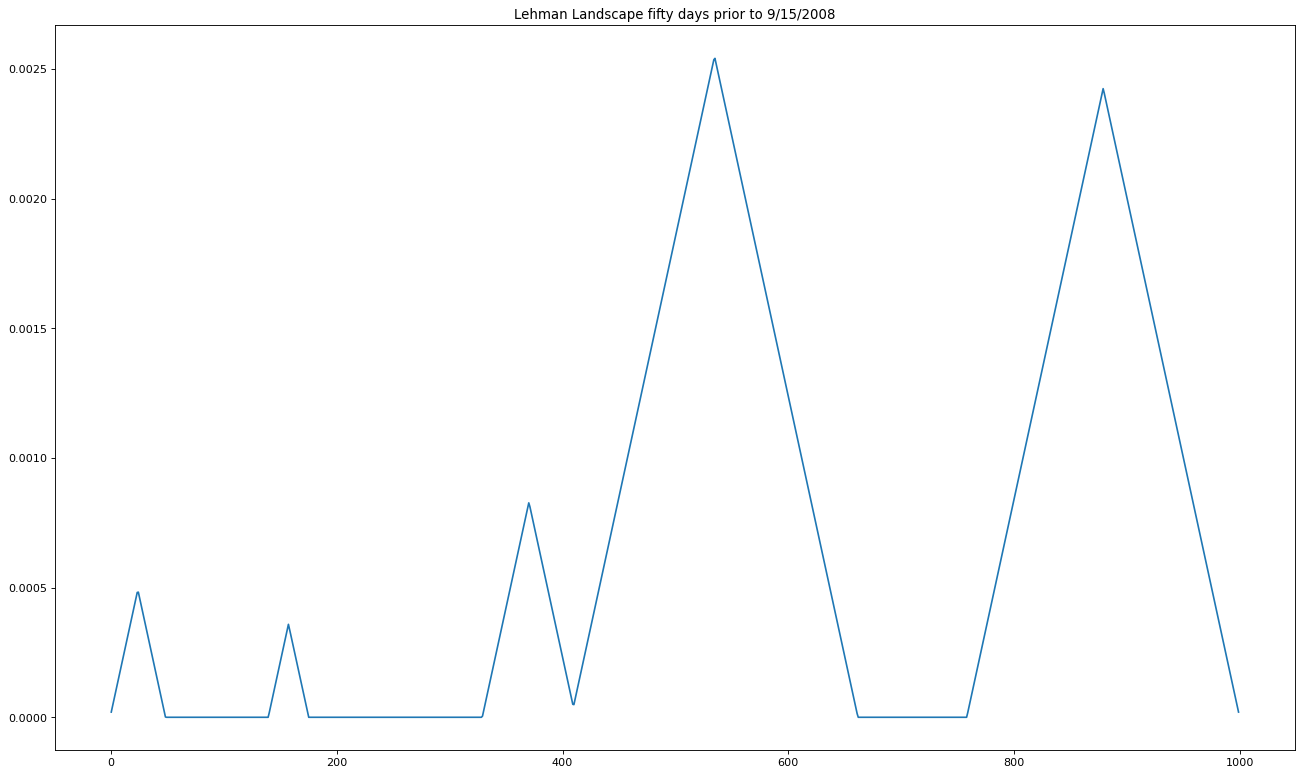

In [71]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_lehman_9_15.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Lehman Landscape fifty days prior to 9/15/2008")
plt.show()

Here are the landscapes two months prior to the Lehman crash.

In [73]:
lehman_index_7_15 = log_returns[: '07-15-2008'].shape[0] -1
lehman_cloud_7_15 = X_clouds[lehman_index_7_15 - 49][0]

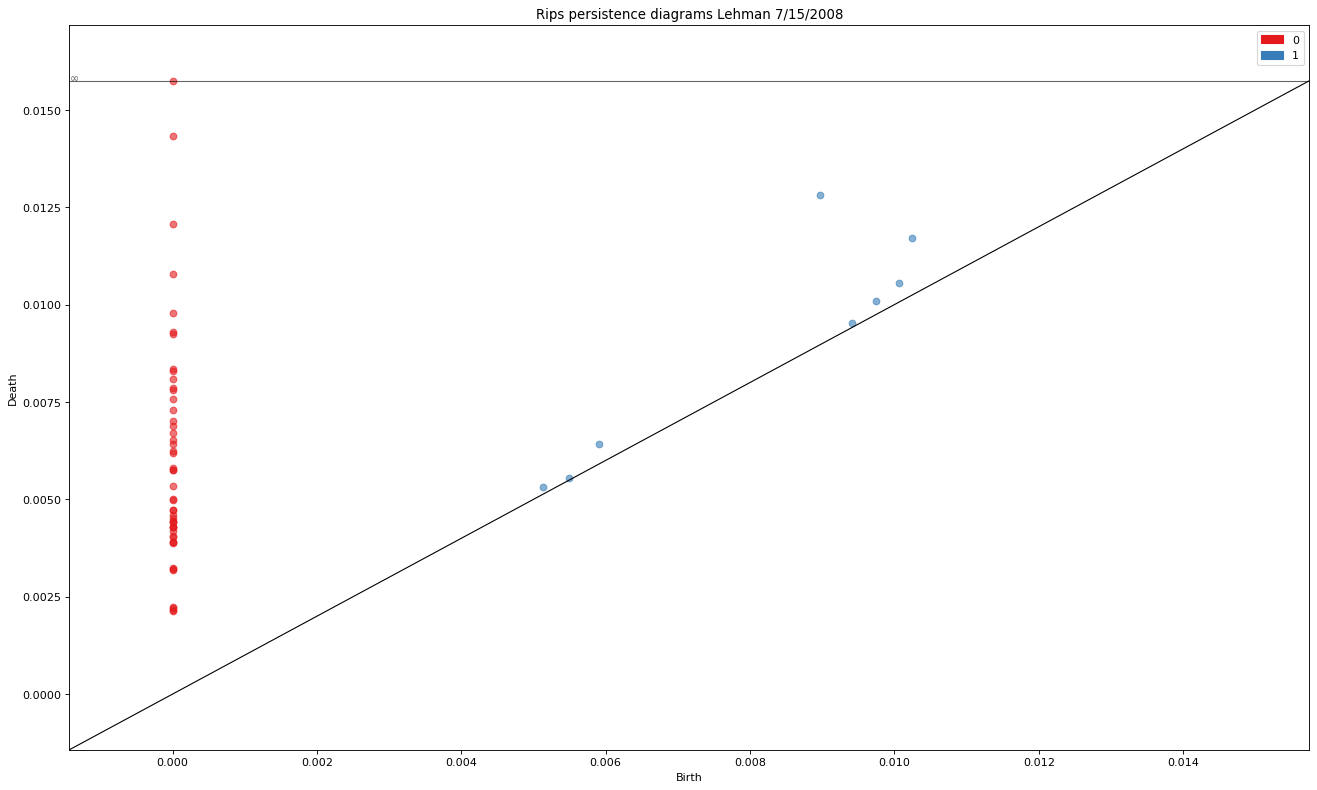

In [74]:
rips_c_lehman_7_15 = gd.RipsComplex(points=lehman_cloud_7_15).create_simplex_tree(max_dimension=2)
dgm = rips_c_lehman_7_15.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Lehman 7/15/2008");

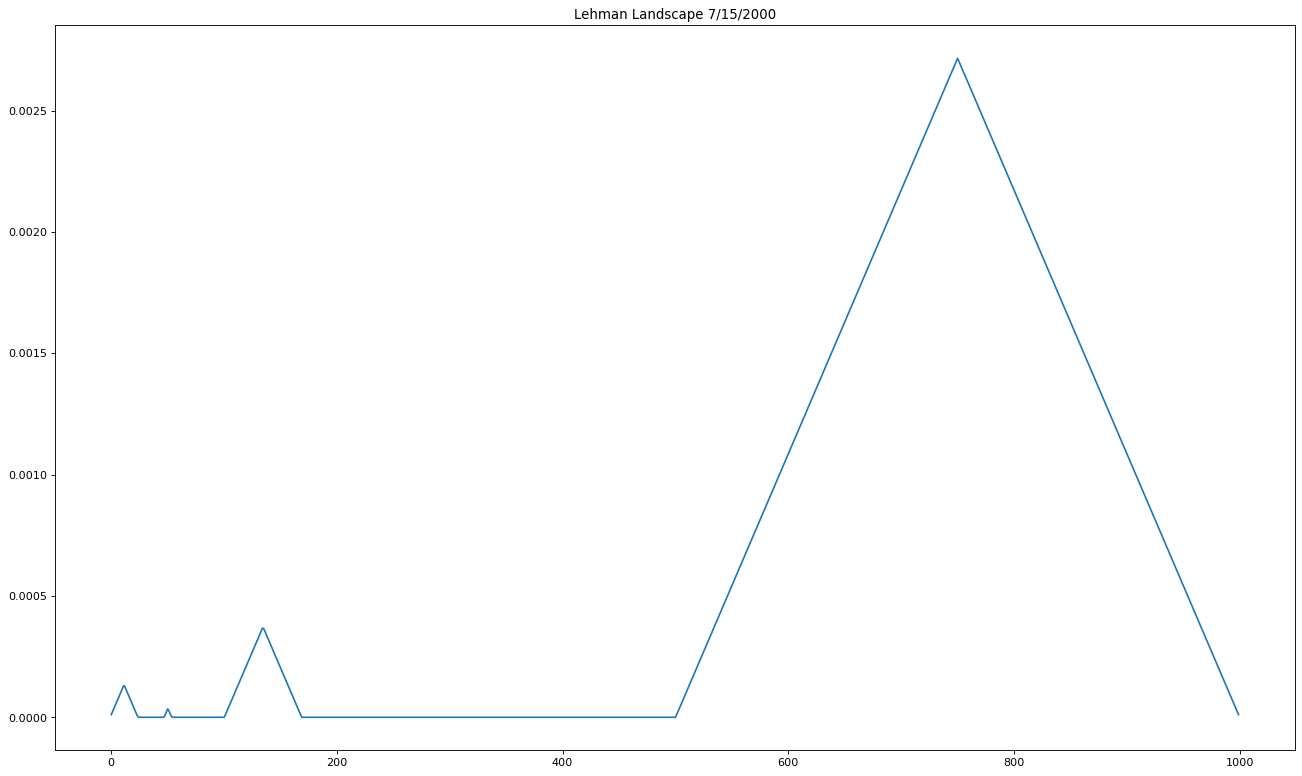

In [75]:
landscapes = gd.representations.Landscape(num_landscapes=1, resolution=1000)
l = landscapes.fit_transform([rips_c_lehman_7_15.persistence_intervals_in_dimension(1)])
y = l[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Lehman Landscape 7/15/2000")
plt.show()

It is clearly seen from these plots that as the stock market becomes more volatile loops in the relevant point clouds become much more pronounced.

## Dot-Com Persistence Landscapes

We compare the persistence landscapes on the critical date Dot-Com crash of March 10, 2000 and two months prior.

In [89]:
dotcom_index_3_10 = log_returns[: '03-10-2000'].shape[0] -1
dotcom_cloud_3_10 = X_clouds[dotcom_index_3_10-49][0]

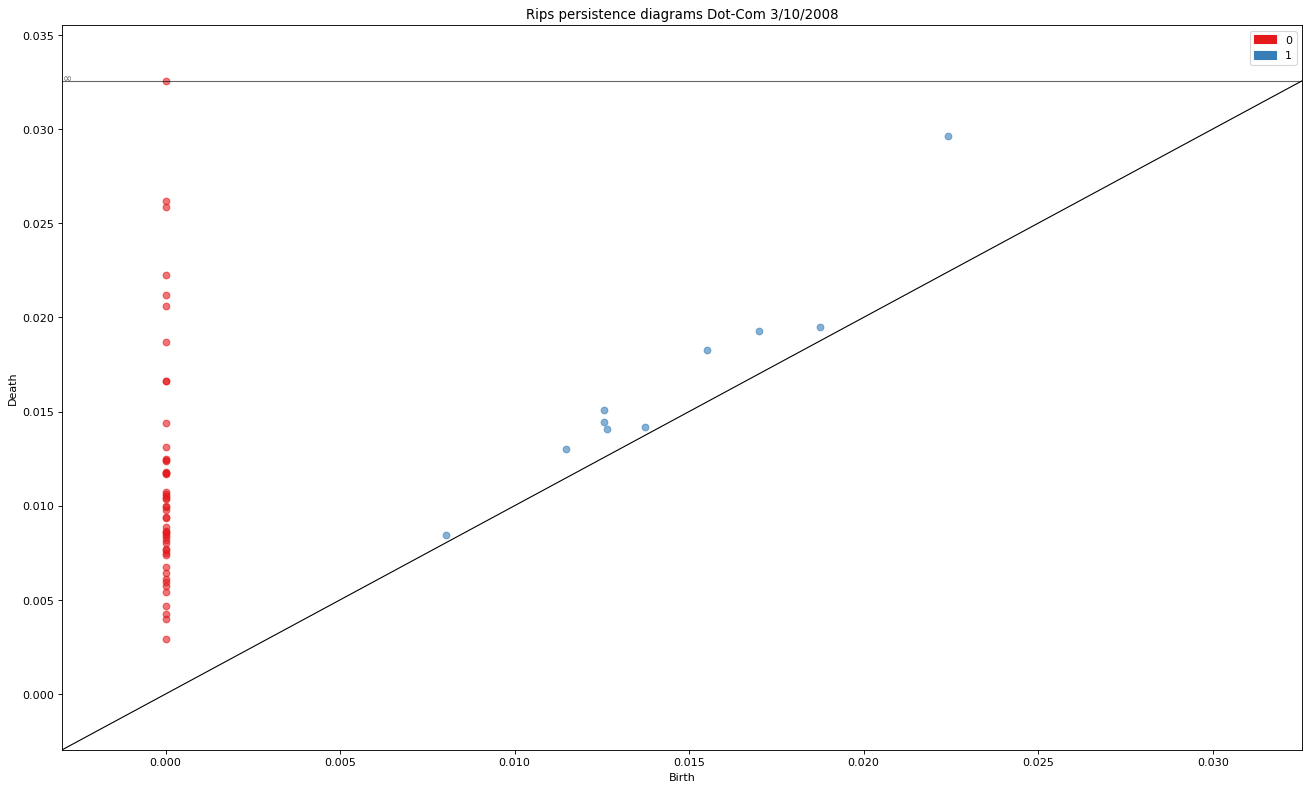

In [90]:
rips_c_dotcom_3_10 = gd.RipsComplex(points=dotcom_cloud_3_10).create_simplex_tree(max_dimension=2)
dgm = rips_c_dotcom_3_10.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Dot-Com 3/10/2008");

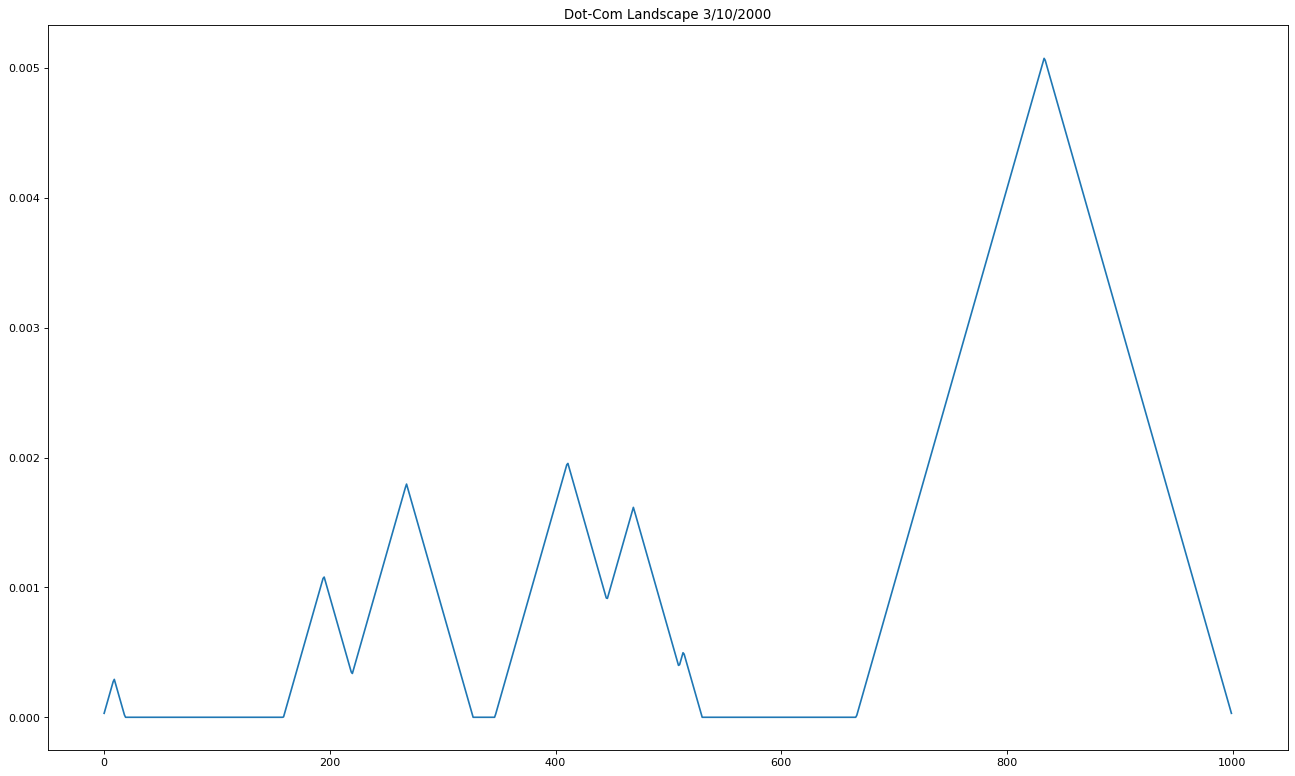

In [91]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_dotcom_3_10.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Dot-Com Landscape 3/10/2000")
plt.show()

Persistence of the cloud two months before crash (1/10/2000)

In [92]:
dotcom_index_1_10 = log_returns[: '01-10-2000'].shape[0]
dotcom_cloud_1_10 = X_clouds[dotcom_index_1_10-49][0]

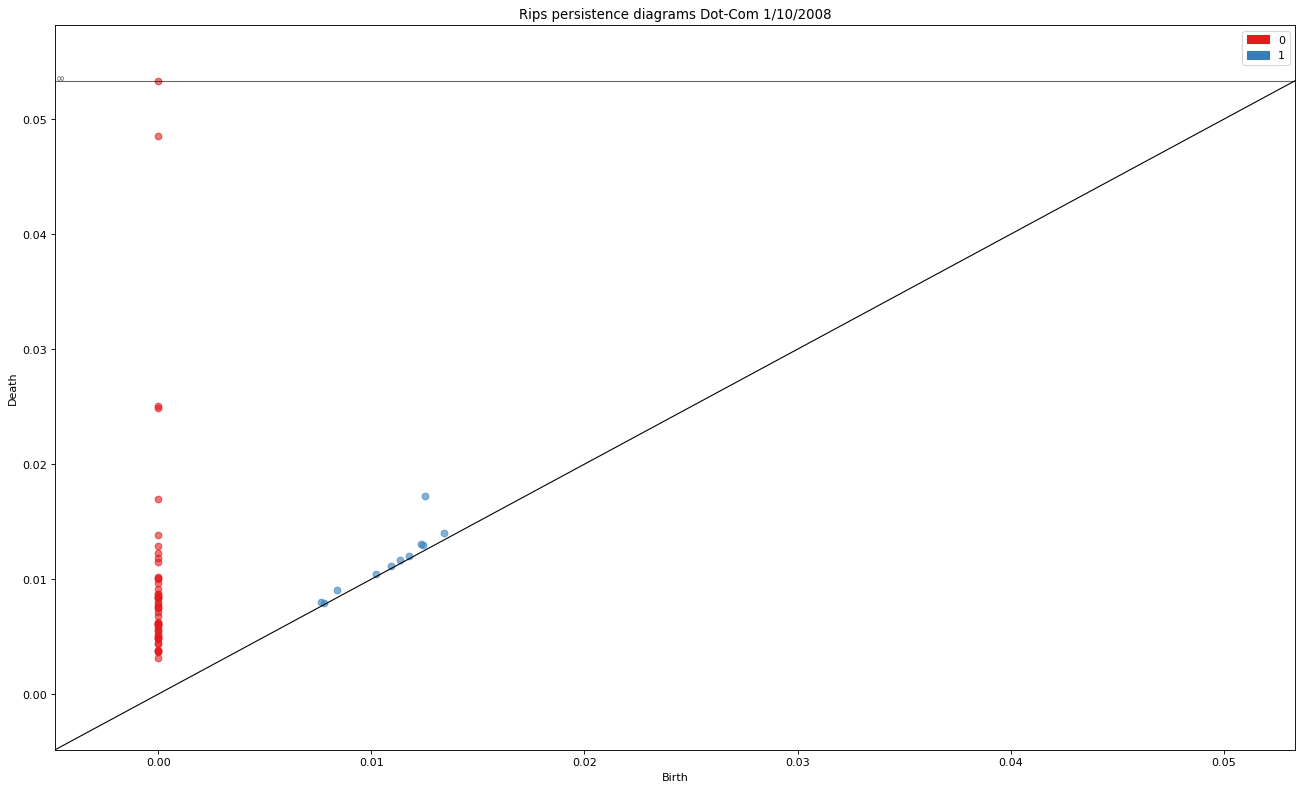

In [93]:
rips_c_dotcom_1_10 = gd.RipsComplex(points=dotcom_cloud_1_10).create_simplex_tree(max_dimension=2)
dgm = rips_c_dotcom_1_10.persistence()
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
gd.plot_persistence_diagram(dgm, axes = ax, legend = True)
plt.title("Rips persistence diagrams Dot-Com 1/10/2008");

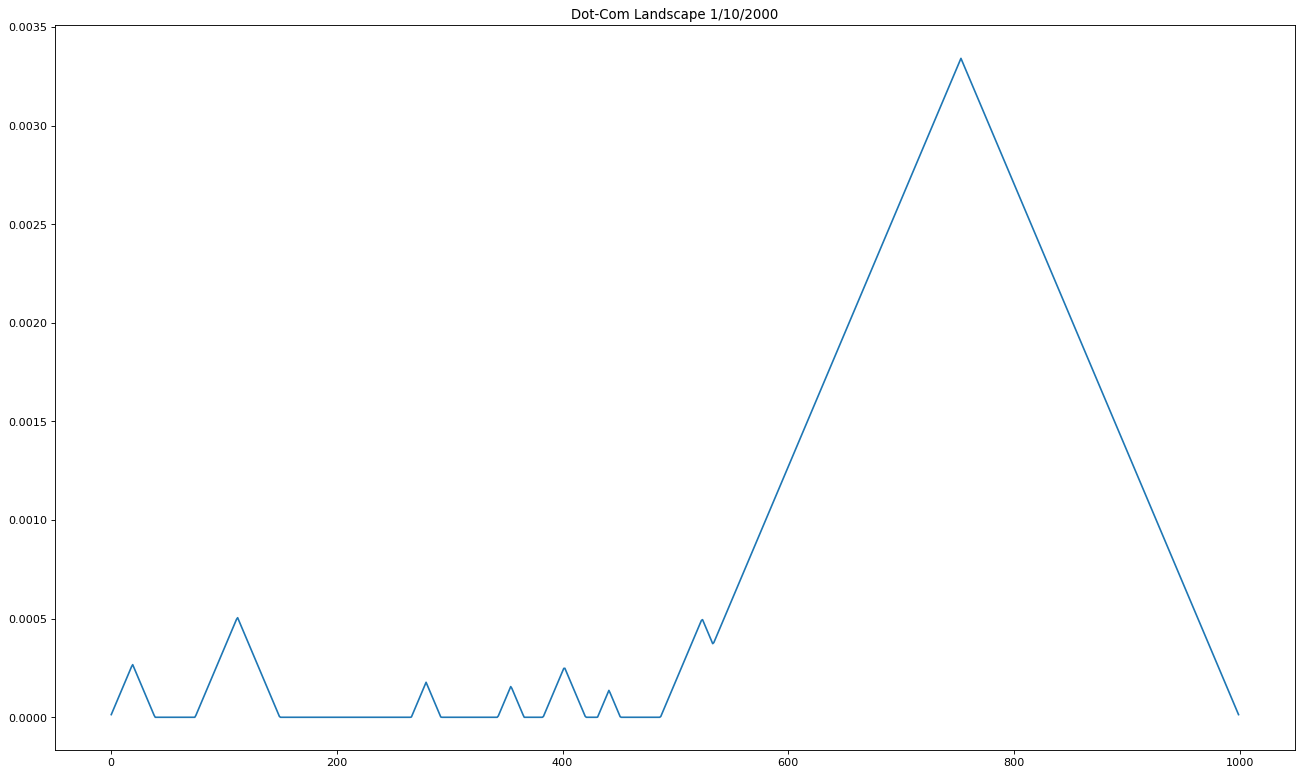

In [94]:
LS = gd.representations.Landscape(num_landscapes=1, resolution=1000)
L = LS.fit_transform([rips_c_dotcom_1_10.persistence_intervals_in_dimension(1)])
y = L[0][:1000]
fig = plt.figure(figsize=(20, 12), dpi=80)
ax = fig.add_subplot()
plt.plot(y)
plt.title("Dot-Com Landscape 1/10/2000")
plt.show()

## Time Series of Norms of Persistence Landscapes

In [30]:
import scipy.integrate as integrate

In [100]:
norms = []
n = X_clouds.shape[0]-1
for i in range(n):
    #print(i)
    rips_complex = gd.RipsComplex(points=X_clouds[i][0]).create_simplex_tree(max_dimension=2)
    persistence_diagram = rips_complex.persistence()
    landscape = gd.representations.Landscape(num_landscapes=1, resolution=1000)
    l = landscape.fit_transform([rips_complex.persistence_intervals_in_dimension(1)])
    y = l[0][:1000]
    l1_norm = integrate.simps(y, x = None)
    #print(l1_norm)
    norms.append(l1_norm)

We add the topological series and ^VIX data to our original data frame.

In [134]:
#insert topological series into original data frame
data['top'] = np.insert(norms, 0 ,np.zeros(51))

In [143]:
vix = pdr.get_data_yahoo("^VIX", start="1987-12-23", end='2016-12-08')['Close']

In [139]:
vix = np.pad(vix.values, (511,0), 'constant', constant_values= 0)

In [141]:
data['^VIX'] = vix

In [125]:
def max_normalize(x):
    maximum = x.max()
    return x/maximum

In [107]:
import plotly.express as px

In [145]:
fig = px.line(max_normalize(data))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Topological time series near the Dotcom crash on 03/10/2000

We graph the normalized topological time series in the year leading up to the Dot-Com crash on 3/10/2000.

In [152]:
year_dot_com = max_normalize(data.loc['3-19-1999':'3-20-2000'])

In [153]:
fig = px.line(year_dot_com)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Topological time series near the Lehman bankruptcy on 09/15/2008


We graph the normalized topological time series in the year leading up to the Lehman crash on 9/15/2008.

In [155]:
year_lehman = max_normalize(data.loc[ '9-25-2007': '9-25-2008'])

In [156]:
fig = px.line(year_lehman)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Analysis of statistical indicators of the topological time series

We quantify temporal variations in the persistence of loops in the time-ordered set of point clouds with a growing market stress. 

In [157]:
rolling_window = 500
sliding_step = 1

### Variance

The variance of the topological time series is substantially growing prior to any of the crashes.

In [181]:
#500 day rolling variance
top_variance = data.top.rolling(window= rolling_window).var()
data['top_variance'] = top_variance
vix_variance = data['^VIX'].rolling(window= rolling_window).var()
data['vix_variance'] = vix_variance

#### Dot-Com Crash

In [182]:
year_dot_com = max_normalize(data['3-15-1999': '3-15-2000'])

In [183]:
fig = px.line(year_dot_com, y = ['top_variance', 'vix_variance'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

We quantify the observed trend with the Mann- Kendall test, which statistically assess a monotonic upward or downward movement of the top_variance over time

In [169]:
import pymannkendall as mk

In [174]:
mk.original_test(year_dot_com.top_variance)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=17.87847931129322, Tau=0.7515516442797592, s=24339.0, var_s=1853141.6666666667, slope=0.0008772624955705645, intercept=0.5310507676715639)

#### Lehman 

In [184]:
year_lehman = max_normalize(data['9-20-2007': '9-20-2008'])

In [185]:
fig = px.line(year_lehman, y = ['top_variance', 'vix_variance'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [175]:
mk.original_test(year_lehman.top_variance)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=21.95193645701913, Tau=0.9264696656001004, s=29534.0, var_s=1809962.0, slope=0.0023404241773642854, intercept=0.18959466436639)

### Graphs during 'stable' periods

In [187]:
fig = px.line(max_normalize(data['1-1-2005': '1-1-2006']), y = ['top_variance', 'vix_variance'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [188]:
fig = px.line(max_normalize(data['1-1-2004': '1-1-2005']), y = ['top_variance', 'vix_variance'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Average spectral density

Spectrum of topological series 250 days before the crashes. We calculate the the average spectral density at low frequencies ( using a rolling window of 500 days). To estimate spectra at low frequencies, we take average of
the spectrum up to 1/8th of all frequencies (excluding the mode at zero)

In [202]:
from scipy import signal

In [245]:
spectra = []
for i in range(0, data.shape[0]-rolling_window+1):
    freq , spec = signal.periodogram(data.top.iloc[i:i+rolling_window])
    mean_spec = spec[2:17].mean()
    spectra.append(mean_spec)

In [246]:
data['spectra'] = np.insert(spectra, 0 ,np.zeros(499))

### Lehman

In [247]:
lehman_spec = data['9-20-2007': '9-20-2008']

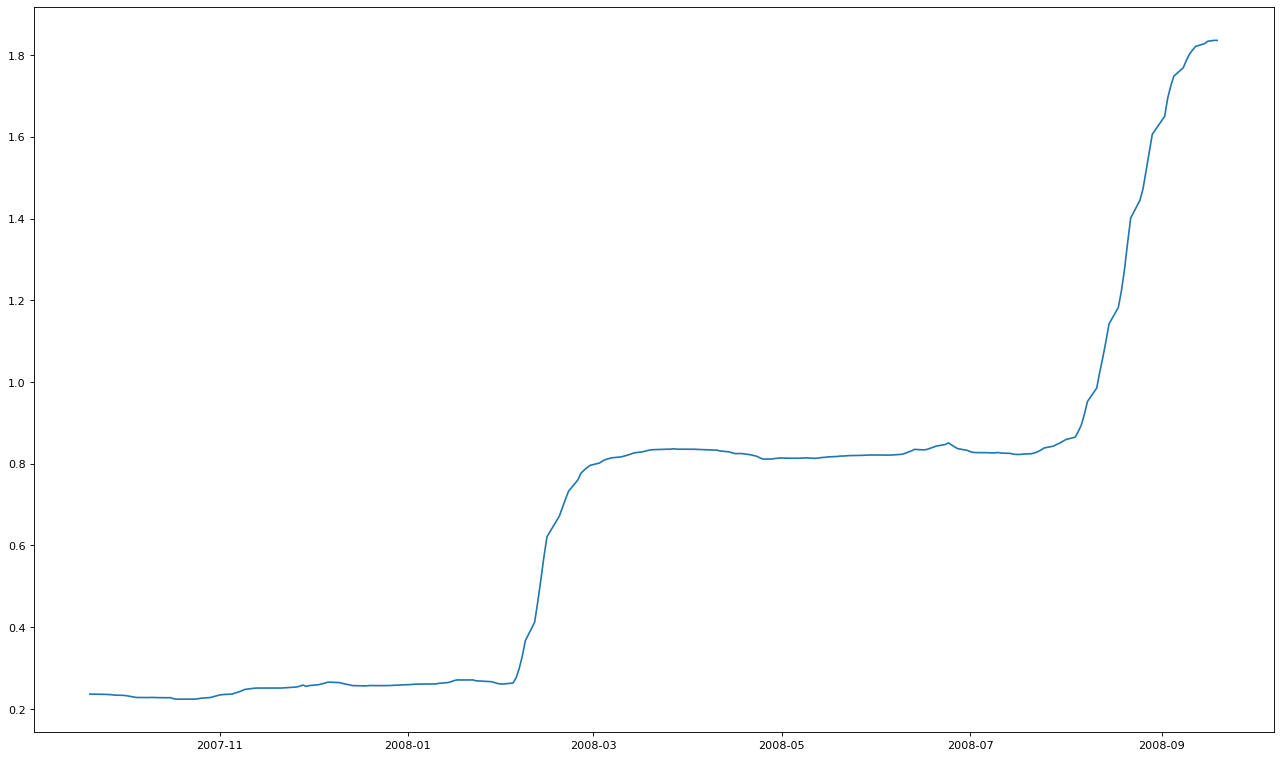

In [248]:
fig = plt.figure(figsize=(20, 12), dpi=80)
plt.plot(lehman_spec.spectra)
plt.show()

In [249]:
mk.original_test(lehman_spec.spectra)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=19.51985248020111, Tau=0.823828345567476, s=26262.0, var_s=1809962.0, slope=0.004094649832998732, intercept=0.2983095941635989)